In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.stats import shapiro
from scipy.stats import ks_2samp
from scipy.stats import wilcoxon, mannwhitneyu

In [3]:
SEASONS = [2019, 2020, 2021, 2022, 2023]
LEAGUES = {"Championship" : ["10", "101"], "Serie-A" : ["24", "241"], "Primeira-Liga" : ["32", "321"], "Segunda-Division" : ["17", "171"], "Ligue-2" : ["60", "601"]}
to_seasons = {2019 : "2019-2020", 2020 : "2020-2021", 2021 : "2021-2022", 2022 : "2022-2023", 2023 : "2023-2024"}

def getDiffPoints(dataframe):
  df_home = dataframe[0].loc[:, ['Home']].loc[:, ('Home', 'Pts')]
  df_away = dataframe[0].loc[:, ['Away']].loc[:, ('Away', 'Pts')]
  diff = df_home.sum() - df_away.sum()
  return diff

def getDiffXGoals(dataframe):
  df_home = dataframe[0].loc[:, ['Home']].loc[:, ('Home', 'xG')]
  df_away = dataframe[0].loc[:, ['Away']].loc[:, ('Away', 'xG')]
  diff = df_home.sum() - df_away.sum()
  return round(diff, 1)

final_df = pd.DataFrame(columns=["League", "Season", "Diff_pts", "Diff_xG"])
for league in LEAGUES.keys():
  for season in SEASONS:
    time.sleep(5)
    if(league == "Serie-A"):
      df = pd.read_html(f'https://fbref.com/en/comps/{LEAGUES[league][0]}/{season}/{season}-{league}-Stats', attrs={"id" :  f'results{season}{LEAGUES[league][1]}_home_away'})
    else :
      df = pd.read_html(f'https://fbref.com/en/comps/{LEAGUES[league][0]}/{to_seasons[season]}/{to_seasons[season]}-{league}-Stats', attrs={"id" :  f'results{to_seasons[season]}{LEAGUES[league][1]}_home_away'})
    diff_pts = getDiffPoints(df)
    diff_xG = getDiffXGoals(df)
    final_df = final_df._append({"League": league, "Season": season, "Diff_pts": diff_pts, "Diff_xG": diff_xG}, ignore_index=True)

final_df

<ipython-input-3-a73a66a8d6eb>:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = final_df._append({"League": league, "Season": season, "Diff_pts": diff_pts, "Diff_xG": diff_xG}, ignore_index=True)


,League,Season,Diff_pts,Diff_xG
0,Championship,2019,171,128.4
1,Championship,2020,123,73.3
2,Championship,2021,237,125.0
3,Championship,2022,153,134.3
4,Championship,2023,207,135.3
5,Serie-A,2019,258,209.2
6,Serie-A,2020,210,99.9
7,Serie-A,2021,243,134.7
8,Serie-A,2022,192,151.7
9,Serie-A,2023,222,167.8


<ipython-input-5-a358a4b48ddc>:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = final_df._append({"Season": to_seasons[season], "result": getMeanPoints(df_pts_home), "xGoals" : getMeanPoints(df_xG_home), "result_away" : getMeanPoints(df_pts_away), "xGoalsAway": getMeanPoints(df_xG_away)}, ignore_index=True)


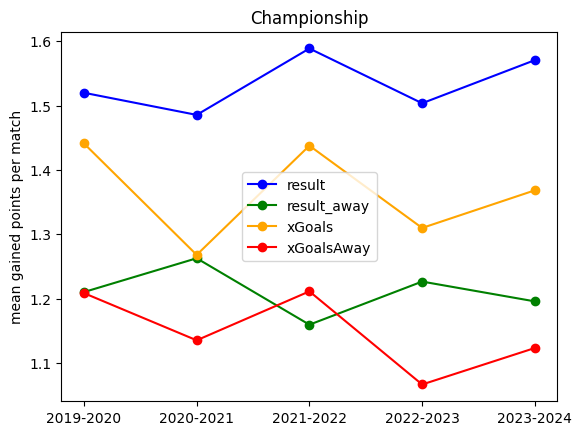

<ipython-input-5-a358a4b48ddc>:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = final_df._append({"Season": to_seasons[season], "result": getMeanPoints(df_pts_home), "xGoals" : getMeanPoints(df_xG_home), "result_away" : getMeanPoints(df_pts_away), "xGoalsAway": getMeanPoints(df_xG_away)}, ignore_index=True)


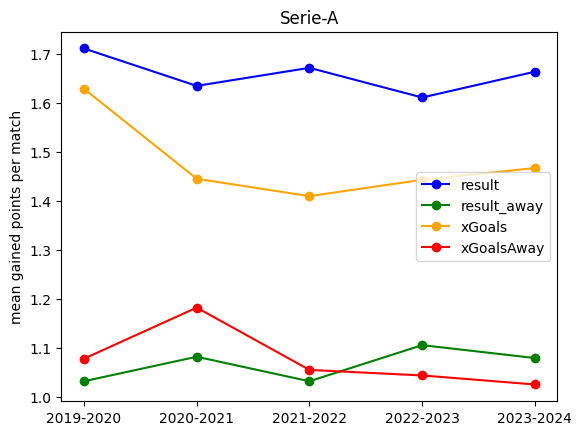

<ipython-input-5-a358a4b48ddc>:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = final_df._append({"Season": to_seasons[season], "result": getMeanPoints(df_pts_home), "xGoals" : getMeanPoints(df_xG_home), "result_away" : getMeanPoints(df_pts_away), "xGoalsAway": getMeanPoints(df_xG_away)}, ignore_index=True)


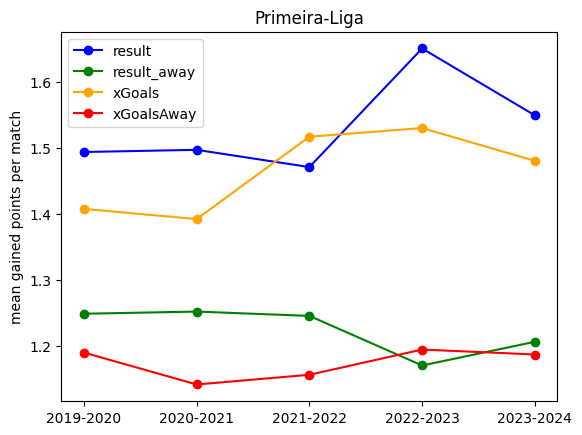

<ipython-input-5-a358a4b48ddc>:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = final_df._append({"Season": to_seasons[season], "result": getMeanPoints(df_pts_home), "xGoals" : getMeanPoints(df_xG_home), "result_away" : getMeanPoints(df_pts_away), "xGoalsAway": getMeanPoints(df_xG_away)}, ignore_index=True)


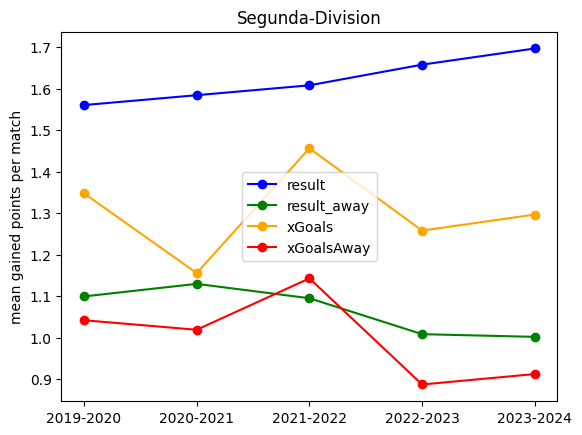

<ipython-input-5-a358a4b48ddc>:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = final_df._append({"Season": to_seasons[season], "result": getMeanPoints(df_pts_home), "xGoals" : getMeanPoints(df_xG_home), "result_away" : getMeanPoints(df_pts_away), "xGoalsAway": getMeanPoints(df_xG_away)}, ignore_index=True)


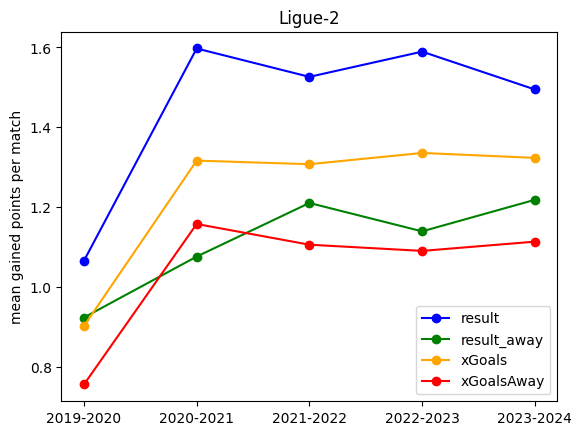

In [5]:
SEASONS = [2019, 2020, 2021, 2022, 2023]
LEAGUES = {"Championship" : ["10", "101"], "Serie-A" : ["24", "241"], "Primeira-Liga" : ["32", "321"], "Segunda-Division" : ["17", "171"], "Ligue-2" : ["60", "601"]}
to_seasons = {2019 : "2019-2020", 2020 : "2020-2021", 2021 : "2021-2022", 2022 : "2022-2023", 2023 : "2023-2024"}

def getMeanPoints(dataframe):
  sum = dataframe.sum()
  numTeams = len(dataframe)
  numMatches = numTeams * (numTeams - 1)
  mean = sum / numMatches
  return mean

for league in LEAGUES :
  final_df = pd.DataFrame(columns=["Season", "result", "xGoals", "result_away", "xGoalsAway"])
  for season in SEASONS :
    time.sleep(5)
    if(league == "Serie-A"):
      df = pd.read_html(f'https://fbref.com/en/comps/{LEAGUES[league][0]}/{season}/{season}-{league}-Stats', attrs={"id" :  f'results{season}{LEAGUES[league][1]}_home_away'})
    else :
      df = pd.read_html(f'https://fbref.com/en/comps/{LEAGUES[league][0]}/{to_seasons[season]}/{to_seasons[season]}-{league}-Stats', attrs={"id" :  f'results{to_seasons[season]}{LEAGUES[league][1]}_home_away'})
    df_pts_home = df[0].loc[:, ['Home']].loc[:, ('Home', 'Pts')]
    df_pts_away = df[0].loc[:, ['Away']].loc[:, ('Away', 'Pts')]
    df_xG_home = df[0].loc[:, ['Home']].loc[:, ('Home', 'xG')]
    df_xG_away = df[0].loc[:, ['Away']].loc[:, ('Away', 'xG')]
    final_df = final_df._append({"Season": to_seasons[season], "result": getMeanPoints(df_pts_home), "xGoals" : getMeanPoints(df_xG_home), "result_away" : getMeanPoints(df_pts_away), "xGoalsAway": getMeanPoints(df_xG_away)}, ignore_index=True)
  plt.plot(final_df['Season'], final_df['result'], marker='o', color="blue", label="result")
  plt.plot(final_df['Season'], final_df['result_away'], marker='o', color="green", label="result_away")
  plt.plot(final_df['Season'], final_df['xGoals'], marker='o', color="orange", label="xGoals")
  plt.plot(final_df['Season'], final_df['xGoalsAway'], marker='o', color="red", label="xGoalsAway")
  plt.title(league)
  plt.ylabel("mean gained points per match")
  plt.legend()
  plt.show()


In [6]:
def decomposeScore(score, home, away):
  goals = score.split(chr(8211))
  if goals[0] > goals[1]:
    home.append(3)
    away.append(0)
  elif goals[0] == goals[1]:
    away.append(1)
    home.append(1)
  else:
    away.append(3)
    home.append(0)
  return home, away

def decomposeXg(dataframe, home, away):
  home.append(dataframe[0])
  away.append(dataframe[1])

def calculate_effect_size(home, away, stat):
  n = len(home)
  z = stat
  return z / np.sqrt(n)

SEASONS = [2019, 2020, 2021, 2022, 2023]
LEAGUES = {"Championship" : ["10", "101"], "Serie-A" : ["24", "241"], "Primeira-Liga" : ["32", "321"], "Segunda-Division" : ["17", "171"], "Ligue-2" : ["60", "601"]}
to_seasons = {2019 : "2019-2020", 2020 : "2020-2021", 2021 : "2021-2022", 2022 : "2022-2023", 2023 : "2023-2024"}

final_df = pd.DataFrame(columns=["League", "Season", "Wilcoxon-result", "Wilcoxon-pvalue", "Effect-size", "Wilcoxon-xG", "Wilcoxon-xG-pvalue", "Effect_size_xG"])

for league in LEAGUES:
  for season in SEASONS:
    time.sleep(5)
    if(league == "Serie-A"):
      df = pd.read_html(f'https://fbref.com/en/comps/{LEAGUES[league][0]}/{season}/schedule/{season}-{league}-Scores-and-Fixtures', attrs={"id" :  f"sched_{season}_{LEAGUES[league][0]}_1"})
    else :
      df = pd.read_html(f'https://fbref.com/en/comps/{LEAGUES[league][0]}/{to_seasons[season]}/schedule/{to_seasons[season]}-{league}-Scores-and-Fixtures', attrs={"id" :  f"sched_{to_seasons[season]}_{LEAGUES[league][0]}_1"})
    df = df[0].drop(['Attendance', 'Notes'], axis=1).dropna()
    data_pts = df.loc[:, ['Score']]
    data_xG = df.loc[:, ['xG', 'xG.1']]
    home_pts = []
    away_pts = []
    home_xG = []
    away_xG = []
    for i in range(len(data_pts)):
      score = data_pts.iloc[i, 0]
      xG = data_xG.iloc[i, :]
      if type(score) == str:
        decomposeScore(score, home_pts, away_pts)
      decomposeXg(xG, home_xG, away_xG)
    wilco_test = wilcoxon(home_pts, away_pts)
    effect_size = calculate_effect_size(home_pts, away_pts, wilco_test.statistic)
    wilco_xG_test = wilcoxon(home_xG, away_xG)
    effect_size_xG = calculate_effect_size(home_xG, away_xG, wilco_xG_test.statistic)
    new_row = pd.DataFrame({
            "League": league,
            "Season": [season],
            "Wilcoxon-result": [wilco_test.statistic],
            "Wilcoxon-pvalue": [wilco_test.pvalue],
            "Effect-size" : [effect_size],
            "Wilcoxon-xG": [wilco_xG_test.statistic],
            "Wilcoxon-xG-pvalue": [wilco_xG_test.pvalue],
            "Effect_size_xG" : [effect_size_xG]
        })
    final_df = pd.concat([final_df, new_row], ignore_index=True)

final_df

<ipython-input-6-1b6969dfde41>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  home.append(dataframe[0])
<ipython-input-6-1b6969dfde41>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  away.append(dataframe[1])
<ipython-input-6-1b6969dfde41>:63: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([final_df, new_row], ignore_index=True)
<ipython-input-6-1

,League,Season,Wilcoxon-result,Wilcoxon-pvalue,Effect-size,Wilcoxon-XG,Wilcoxon-XG-pvalue,Effect_size_xG,Effect_size,Wilcoxon-xG,Wilcoxon-xG-pvalue
0,Championship,2019,34946.0,4.520239e-03,NaN,NaN,NaN,2258.192043,1487.400536,53055.5,1.889085e-07
1,Championship,2020,38502.0,4.364564e-02,NaN,NaN,NaN,2585.861963,1638.753947,60754.0,5.265212e-03
2,Championship,2021,34569.0,1.013505e-04,NaN,NaN,NaN,2400.096507,1471.354351,56389.5,7.997368e-06
3,Championship,2022,35552.0,1.106970e-02,NaN,NaN,NaN,2037.439944,1513.193609,47869.0,9.738166e-09
4,Championship,2023,37524.0,7.939517e-04,NaN,NaN,NaN,2247.827995,1597.127503,52812.0,8.939138e-07
5,Serie-A,2019,13867.0,3.035564e-07,NaN,NaN,NaN,824.271008,711.362090,16068.0,1.237318e-18
6,Serie-A,2020,13786.5,2.192050e-05,NaN,NaN,NaN,1290.372973,707.232528,25154.0,2.295555e-05
7,Serie-A,2021,12462.0,7.154598e-07,NaN,NaN,NaN,1001.021429,639.287111,19513.5,5.821978e-12
8,Serie-A,2022,14196.0,1.042119e-04,NaN,NaN,NaN,1013.256221,728.239434,19752.0,1.484602e-12
9,Serie-A,2023,14664.0,1.331794e-05,NaN,NaN,NaN,811.668535,753.239085,15801.5,4.831435e-17


In [7]:
SEASONS = [2019, 2020, 2021, 2022, 2023]
LEAGUES = {"Championship" : ["10", "101"], "Serie-A" : ["24", "241"], "Primeira-Liga" : ["32", "321"], "Segunda-Division" : ["17", "171"], "Ligue-2" : ["60", "601"]}
to_seasons = {2019 : "2019-2020", 2020 : "2020-2021", 2021 : "2021-2022", 2022 : "2022-2023", 2023 : "2023-2024"}

def mannwhitneyutest(season1, season2):
  stat, p_value = mannwhitneyu(season1, season2, alternative="greater")
  return stat, p_value

def decomposeScoreHome(score, home):
  goals = score.split(chr(8211))
  if goals[0] > goals[1]:
    home.append(3)
  elif goals[0] == goals[1]:
    home.append(1)
  else:
    home.append(0)
  return home

tableaux = {}
for league in LEAGUES :
  tableaux[league] = pd.DataFrame(index = SEASONS, columns = SEASONS)

for league in LEAGUES:
    season = 2019
    while season <= 2023:
      season1 = []
      time.sleep(5)
      if(league == "Serie-A"):
        df = pd.read_html(f'https://fbref.com/en/comps/{LEAGUES[league][0]}/{season}/schedule/{season}-{league}-Scores-and-Fixtures', attrs={"id" :  f"sched_{season}_{LEAGUES[league][0]}_1"})
      else :
        df = pd.read_html(f'https://fbref.com/en/comps/{LEAGUES[league][0]}/{to_seasons[season]}/schedule/{to_seasons[season]}-{league}-Scores-and-Fixtures', attrs={"id" :  f"sched_{to_seasons[season]}_{LEAGUES[league][0]}_1"})
      df = df[0].drop(['Attendance', 'Notes'], axis=1).dropna()
      data_pts = df.loc[:, ['Score']]
      for i in range(len(data_pts)):
        score = data_pts.iloc[i, 0]
        if type(score) == str:
          decomposeScoreHome(score, season1)
      other_season = season + 1
      while other_season <= 2023:
        season2 = []
        if(league == "Serie-A"):
          df = pd.read_html(f'https://fbref.com/en/comps/{LEAGUES[league][0]}/{season}/schedule/{season}-{league}-Scores-and-Fixtures', attrs={"id" :  f"sched_{season}_{LEAGUES[league][0]}_1"})
        else :
          df = pd.read_html(f'https://fbref.com/en/comps/{LEAGUES[league][0]}/{to_seasons[season]}/schedule/{to_seasons[season]}-{league}-Scores-and-Fixtures', attrs={"id" :  f"sched_{to_seasons[season]}_{LEAGUES[league][0]}_1"})
        df = df[0].drop(['Attendance', 'Notes'], axis=1).dropna()
        data_pts = df.loc[:, ['Score']]
        for i in range(len(data_pts)):
          score = data_pts.iloc[i, 0]
          if type(score) == str:
            decomposeScoreHome(score, season2)
        _, p = mannwhitneyutest(season1, season2)
        tableaux[league].loc[other_season, season] = float(p)
        other_season += 1
      season += 1


HTTPError: HTTP Error 429: Too Many Requests

In [8]:
from IPython.display import display
def color_red_if_below(value):
    if value == '':
      return 'color: white'
    color = 'red' if value < 0.05 else 'white'
    return f'color: {color}'

for league in LEAGUES:
  tableau = tableaux[league].fillna('')
  tableau_styled = tableau.style.applymap(color_red_if_below)
  print(f'{league} xPoints change significance with mann')
  display(tableau_styled)
  print('\n')

Championship xPoints change significance with mann


<ipython-input-8-faa712604c99>:10: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  tableau_styled = tableau.style.applymap(color_red_if_below)


,2019,2020,2021,2022,2023
2019,,,,,
2020,0.500040,,,,
2021,0.500040,0.500040,,,
2022,0.500040,0.500040,0.500040,,
2023,0.500040,0.500040,0.500040,0.500040,




Serie-A xPoints change significance with mann


,2019,2020,2021,2022,2023
2019,,,,,
2020,,,,,
2021,,,,,
2022,,,,,
2023,,,,,




Primeira-Liga xPoints change significance with mann


,2019,2020,2021,2022,2023
2019,,,,,
2020,,,,,
2021,,,,,
2022,,,,,
2023,,,,,




Segunda-Division xPoints change significance with mann


,2019,2020,2021,2022,2023
2019,,,,,
2020,,,,,
2021,,,,,
2022,,,,,
2023,,,,,




Ligue-2 xPoints change significance with mann


,2019,2020,2021,2022,2023
2019,,,,,
2020,,,,,
2021,,,,,
2022,,,,,
2023,,,,,
